In [1]:
import os
print(os.listdir(r'C:\Users\dhruv\OneDrive\Desktop\7th sem project\corn or maize\Dataset'))
dir = len(os.listdir(r'C:\Users\dhruv\OneDrive\Desktop\7th sem project\corn or maize\Dataset'))
dir

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


4

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 5
ncols = 5

pic_index = 0

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'Dataset',
        target_size=(128, 128),
        batch_size=64,
        class_mode='categorical' )
label_map = (training_set.class_indices)


test_set = test_datagen.flow_from_directory(
        'Dataset',
        target_size=(128, 128),
        batch_size=64,
        class_mode='categorical')
print(label_map)


Found 4188 images belonging to 4 classes.
Found 4188 images belonging to 4 classes.
{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}


In [4]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [5]:
model = models.Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Hidden layer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.5))

# Output layer
model.add(Dense(units=4, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 8)         1160      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 8)         0

In [7]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(
      training_set,
      # steps_per_epoch=2,
      epochs=10,
      validation_data=test_set,
      validation_steps=100
)

Epoch 1/10
66/66 [==============================] - 48s 727ms/step - loss: 0.4953 - accuracy: 0.7868 - val_loss: 0.4055 - val_accuracy: 0.8364
Epoch 2/10
66/66 [==============================] - 34s 519ms/step - loss: 0.4379 - accuracy: 0.8152
Epoch 3/10
66/66 [==============================] - 34s 518ms/step - loss: 0.4083 - accuracy: 0.8295
Epoch 4/10
66/66 [==============================] - 34s 519ms/step - loss: 0.3809 - accuracy: 0.8360
Epoch 5/10
66/66 [==============================] - 35s 523ms/step - loss: 0.3567 - accuracy: 0.8450
Epoch 6/10
66/66 [==============================] - 34s 518ms/step - loss: 0.3637 - accuracy: 0.8383
Epoch 7/10
66/66 [==============================] - 35s 521ms/step - loss: 0.3457 - accuracy: 0.8481
Epoch 8/10
66/66 [==============================] - 34s 519ms/step - loss: 0.3501 - accuracy: 0.8453
Epoch 9/10
66/66 [==============================] - 35s 533ms/step - loss: 0.3512 - accuracy: 0.8508
Epoch 10/10
66/66 [==============================

In [9]:
model.evaluate(test_set)

66/66 [==============================] - 10s 158ms/step - loss: 0.4744 - accuracy: 0.7978


[0.4744137227535248, 0.7977554798126221]

In [10]:
preds = model.predict(test_set)

66/66 [==============================] - 11s 157ms/step


1/1 [==============================] - 0s 79ms/step
Healthy


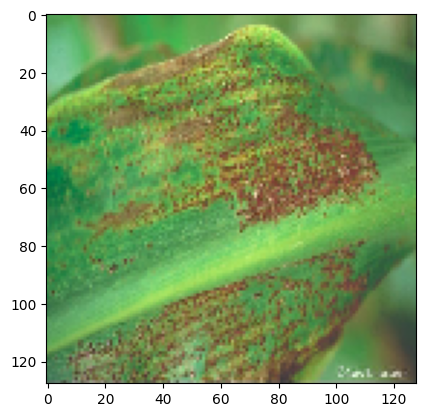

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

# Upload images and make predictions
uploaded_files = [r"C:\Users\dhruv\OneDrive\Desktop\7th sem project\corn or maize\Dataset\Common_Rust\Corn_Common_Rust (4).jpg"]  # Replace with the filenames you've uploaded
for fn in uploaded_files:
    path = fn
    img = image.load_img(path, target_size=(128, 128))
    x = image.img_to_array(img)
    plt.imshow(x/255.)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    prediction = model.predict(images)
    class_name = os.listdir(r"C:\Users\dhruv\OneDrive\Desktop\7th sem project\corn or maize\Dataset")
    print(class_name[np.argmax(prediction[0])])